In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Collect statistics from spreadsheet

In [12]:
import pandas as pd

pet_scan_table = pd.read_csv("spreadsheets/oasis/oasis_3_pet_sessions.csv")
print(pet_scan_table.head())
print(f"Number of PET scans: {pet_scan_table.shape[0]}")

  XNAT_PETSESSIONDATA ID   Subject  Date   Age  stabilization  studyType  \
0    OAS30001_AV45_d2430  OAS30001   NaN  71.0            NaN        NaN   
1     OAS30001_FDG_d2650  OAS30001   NaN  72.0            NaN        NaN   
2     OAS30001_PIB_d0423  OAS30001   NaN  66.0            NaN        NaN   
3     OAS30001_PIB_d0847  OAS30001   NaN  67.0            NaN        NaN   
4     OAS30001_PIB_d1317  OAS30001   NaN  68.0            NaN        NaN   

   patientID  patientName  units  dose  ...  intermediate  half-life  isotope  \
0        NaN          NaN    NaN   NaN  ...           NaN        NaN      NaN   
1        NaN          NaN    NaN   NaN  ...           NaN        NaN      NaN   
2        NaN          NaN    NaN   NaN  ...           NaN        NaN      NaN   
3        NaN          NaN    NaN   NaN  ...           NaN        NaN      NaN   
4        NaN          NaN    NaN   NaN  ...           NaN        NaN      NaN   

   startTime  transmissions  name  startTime.1  UID  Fre

In [13]:
ct_scan_table = pd.read_csv("spreadsheets/oasis/oasis_3_ct_sessions.csv")
print(ct_scan_table.head())
print(f"Number of CT scans: {ct_scan_table.shape[0]}")

  XNAT_CTSESSIONDATA ID   Subject  Date  Age  dcmAccessionNumber  \
0     OAS30001_CT_d2438  OAS30001   NaN  NaN                 NaN   
1     OAS30001_CT_d3132  OAS30001   NaN  NaN                 NaN   
2     OAS30001_CT_d3746  OAS30001   NaN  NaN                 NaN   
3     OAS30001_CT_d4467  OAS30001   NaN  NaN                 NaN   
4     OAS30002_CT_d2345  OAS30002   NaN  NaN                 NaN   

   dcmPatientId  dcmPatientName  UID  FreeSurfers  PUPs  
0           NaN             NaN  NaN          NaN   NaN  
1           NaN             NaN  NaN          NaN   NaN  
2           NaN             NaN  NaN          NaN   NaN  
3           NaN             NaN  NaN          NaN   NaN  
4           NaN             NaN  NaN          NaN   NaN  
Number of CT scans: 1469


In [16]:
mr_scan_table = pd.read_csv("spreadsheets/oasis/oasis_3_mr_sessions.csv")
print(mr_scan_table.head())

# remove last 2 columns be
mr_scan_table = mr_scan_table.iloc[:-2]

scans = mr_scan_table['Scans'].str.split(',')
scan_type_to_count_map = {}

for scan_types in scans:
    if not isinstance(scan_types, list):
        continue
    for scan_type in scan_types:
        split_str = scan_type.split('(')
        type_name = split_str[0].strip()
        scan_count = int(split_str[1].split(')')[0])
        if type_name not in scan_type_to_count_map:
            scan_type_to_count_map[type_name] = 0
        scan_type_to_count_map[type_name] += scan_count

print()
print(scan_type_to_count_map)
print()
print("Modalities:")
print(scan_type_to_count_map.keys())
print()
count = scan_type_to_count_map["T1w"]
print(f"Number of MR T1 scans: {count}")
count = scan_type_to_count_map["T2w"]
print(f"Number of MR T2 scans: {count}")
count = scan_type_to_count_map["T2star"]
print(f"Number of MR T2* scans: {count}")
count = scan_type_to_count_map["FLAIR"]
print(f"Number of MR FLAIR scans: {count}")
count = scan_type_to_count_map["dwi"]
print(f"Number of MR DTI scans: {count}")
count = scan_type_to_count_map["bold"]
print(f"Number of MR BOLD scans: {count}")
count = scan_type_to_count_map["asl"] + scan_type_to_count_map["pasl"]
print(f"Number of MR ASL scans: {count}")
count = scan_type_to_count_map["angio"]
print(f"Number of MR Time of Flight MRA scans: {count}")

               MR ID  Date   Subject   Age Scanner  \
0  OAS30001_MR_d0129   NaN  OAS30001  65.0    3.0T   
1  OAS30001_MR_d0757   NaN  OAS30001  67.0    3.0T   
2  OAS30001_MR_d2430   NaN  OAS30001  71.0    3.0T   
3  OAS30001_MR_d3132   NaN  OAS30001  73.0    3.0T   
4  OAS30001_MR_d3746   NaN  OAS30001   NaN     NaN   

                                               Scans  FreeSurfers  PUPs  
0                            bold(3), T1w(2), T2w(2)          1.0   NaN  
1  bold(2), dwi(1), minIP(1), swi(1), T1w(2), T2s...          1.0   NaN  
2  angio(1), asl(1), dwi(2), fieldmap(3), FLAIR(1...          1.0   NaN  
3  asl(2), bold(2), dwi(2), fieldmap(3), T1w(1), ...          1.0   NaN  
4  angio(1), asl(1), bold(2), fieldmap(3), FLAIR(...          1.0   NaN  

{'bold': 5114, 'T1w': 4116, 'T2w': 4051, 'dwi': 3269, 'minIP': 1231, 'swi': 1229, 'T2star': 2350, 'angio': 896, 'asl': 1337, 'fieldmap': 3818, 'FLAIR': 1381, 'pasl': 223, 'GRE': 1326}

Modalities:
dict_keys(['bold', 'T1w', 'T2w', 

### 2. Download Oasis-3 Dataset

TODO: add download instructions

### 3. Implement PyTorch Dataset & Visualize

10
(1, 512, 512, 111)
(1, 512, 512, 74)
(1, 512, 512, 74)
(1, 512, 512, 111)
(1, 512, 512, 74)


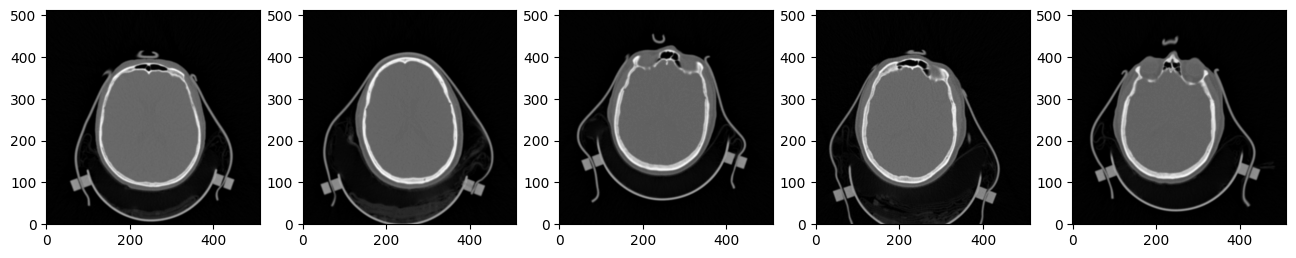

In [15]:
from datasets.oasis import Oasis3CTDataset

dataset = Oasis3CTDataset("spreadsheets/oasis/oasis_3_ct_sessions.csv", "data/oasis/ct_sessions/")

print(len(dataset))

import random
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

indices = random.sample(range(0, len(dataset)), 5)
for sample_index in range(5):
    sample_data = dataset[sample_index]  # Get the i-th sample and its label
    print(sample_data.shape)
    half = int(sample_data.shape[3] / 2)
    mri_sample_slice = sample_data[0, :, :, half]

    plt.subplot(1, 5, sample_index+1)  # Create a subplot for each sample
    plt.imshow(mri_sample_slice.T, cmap='gray', origin='lower')

plt.show()

3
(1, 128, 128, 63, 51)


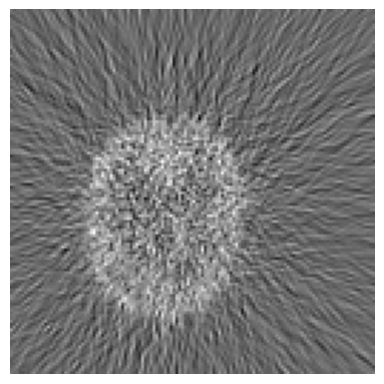

In [13]:
from datasets.oasis import Oasis3PETDataset

dataset = Oasis3PETDataset("spreadsheets/oasis/oasis_3_pet_sessions.csv", "data/oasis/pet_sessions/")

print(len(dataset))

import random
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

for sample_index in range(1):
    sample_index = 2
    sample_data = dataset[sample_index]  # Get the i-th sample and its label
    print(sample_data.shape)
    half = int(sample_data.shape[3] / 2)
    mri_sample_slice = sample_data[0, :, :, half, 25]

    plt.subplot(1, 3, sample_index+1)  # Create a subplot for each sample
    plt.imshow(mri_sample_slice.T, cmap='gray', origin='lower')
    # plt.title(f"{}")
    plt.axis('off')

plt.show()

# MR Visualization

In [36]:
%matplotlib inline

import os
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from IPython.display import HTML

def visualize_structural_mri(session_directory):
    file_format = ".nii.gz"
    count = 0
    for current_root, dirs, files in os.walk(session_directory):
        for file in files:
            if file.endswith(file_format) and "anat" in current_root:
                count += 1
    plt.figure(figsize=(16, 16))
    index = 0
    for current_root, dirs, files in os.walk(session_directory):
        for file in files:
            if file.endswith(file_format) and "anat" in current_root:
                nii_data = nib.load(os.path.join(current_root, file))

                image_data = nii_data.get_fdata()
                data_shape = image_data.shape
                print(file)

                half = int(image_data.shape[2] / 2)
                mri_sample_slice = image_data[:, :, half]

                plt.subplot(1, count, index + 1)  # Create a subplot for each sample
                plt.imshow(mri_sample_slice.T, cmap='gray', origin='lower')
                plt.axis('off')

                modality = ""
                if "T1w" in file:
                    modality = "T1w"
                elif "TSE_T2w" in file:
                    modality = "TSE-T2w"
                elif "T2w" in file:
                    modality = "T2w"
                elif "T2star" in file:
                    modality = "T2*"
                elif "FLAIR" in file:
                    modality = "FLAIR"
                elif "angio" in file:
                    modality = "TOF MRA"

                plt.title(f"{modality} {data_shape}")
                index += 1
    plt.show()

### MR Session OAS30001_MR_d0129

sub-OAS30001_ses-d0129_run-02_T1w.nii.gz
sub-OAS30001_ses-d0129_acq-TSE_T2w.nii.gz
sub-OAS30001_ses-d0129_run-01_T1w.nii.gz
sub-OAS30001_ses-d0129_T2w.nii.gz


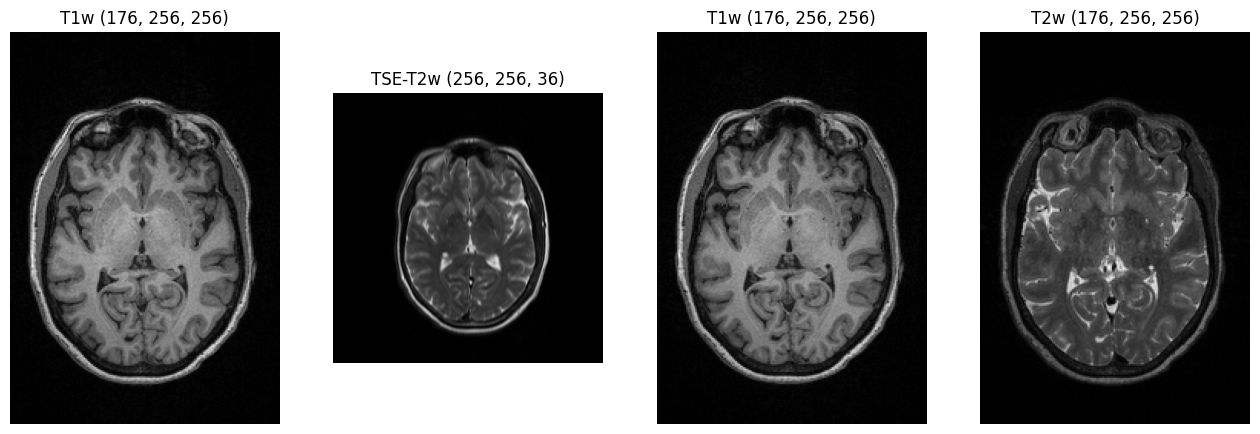

In [37]:
from datasets.oasis import Oasis3MRDataset

visualize_structural_mri("data/oasis/mr_sessions/OAS30001_MR_d0129/")

### MR Session OAS30001_MR_d0757

sub-OAS30001_ses-d0757_run-02_T1w.nii.gz
sub-OAS30001_ses-d0757_acq-TSE_T2w.nii.gz
sub-OAS30001_ses-d0757_run-01_T1w.nii.gz
sub-OAS30001_ses-d0757_T2w.nii.gz
sub-OAS30001_ses-d0757_T2star.nii.gz


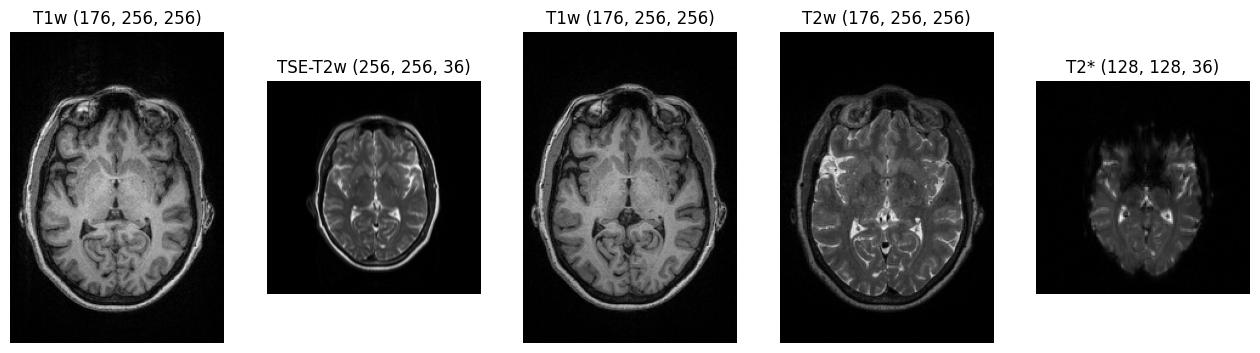

In [38]:
visualize_structural_mri("data/oasis/mr_sessions/OAS30001_MR_d0757/")

### MR Session OAS30001_MR_d2430

sub-OAS30001_ses-d2430_FLAIR.nii.gz
sub-OAS30001_ses-d2430_acq-TOF_angio.nii.gz
sub-OAS30001_ses-d2430_acq-TSE_T2w.nii.gz
sub-OAS30001_ses-d2430_T2star.nii.gz
sub-OAS30001_ses-d2430_T1w.nii.gz


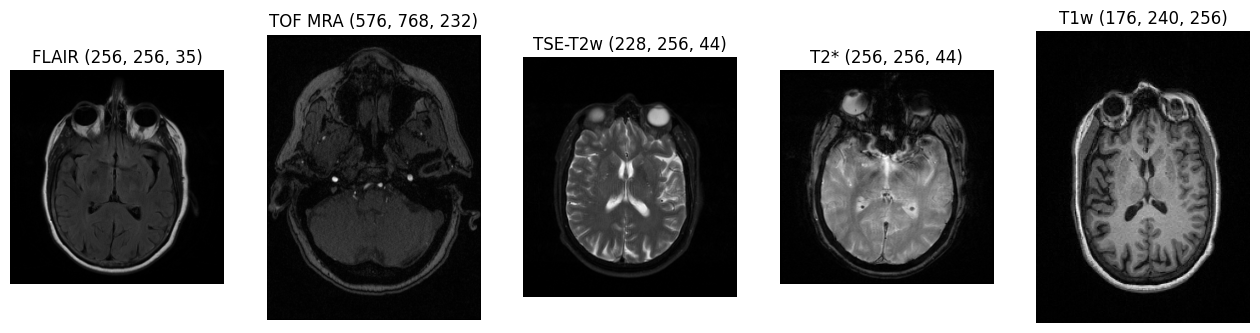

In [39]:
visualize_structural_mri("data/oasis/mr_sessions/OAS30001_MR_d2430/")

# PET Visualization